# TASK 7 
### Determine the first 3 peaks of the corresponding diffractogram for an incident X-ray Cu Kα
wavelength λ = 1.54060 Å.

In [1]:
# Download CIF file of "mp-1022" material
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

with MPRester("AaCuMl5yxEVFLZ8n") as m:
    # Get the information for material "mp-1022"
    structure = m.get_structure_by_material_id("mp-1022") # K2S

### CuKa wavelength selection

In [2]:
# Import relevant functions and methods from pymatgen library
from pymatgen.analysis.diffraction.xrd import XRDCalculator

# Selection of the incident X-ray Cu Kα cooresponding to λ = 1.54060 Å.
# The available incident radiation are: CuKa, CuKa1, CuKa2
XRDCuKaPattern = XRDCalculator() # The defaults is “CuKa”, i.e, Cu K_alpha radiation
XRDCuKa1Pattern = XRDCalculator(wavelength = "CuKa1") 
XRDCuKa2Pattern = XRDCalculator(wavelength = "CuKa2")

print("The available CuKa radiations are:")
print("a. CuKa wavelength:\t", round(XRDCuKaPattern.wavelength, 4))
print("b. CuKa1 wavelength:\t", round(XRDCuKa1Pattern.wavelength, 4), "<- Selected Wavelength")
print("c. CuKa2 wavelength:\t", round(XRDCuKa2Pattern.wavelength, 4))


pattern = XRDCuKa1Pattern.get_pattern(structure, scaled = False)

The available CuKa radiations are:
a. CuKa wavelength:	 1.5418
b. CuKa1 wavelength:	 1.5406 <- Selected Wavelength
c. CuKa2 wavelength:	 1.5444


### Diffraction pattern graphic

In [3]:
XRDCuKa1Pattern.show_plot(structure)

<Figure size 1600x1000 with 1 Axes>

#### Diffraction pattern - 2theta (°) - from https://materialsproject.org/

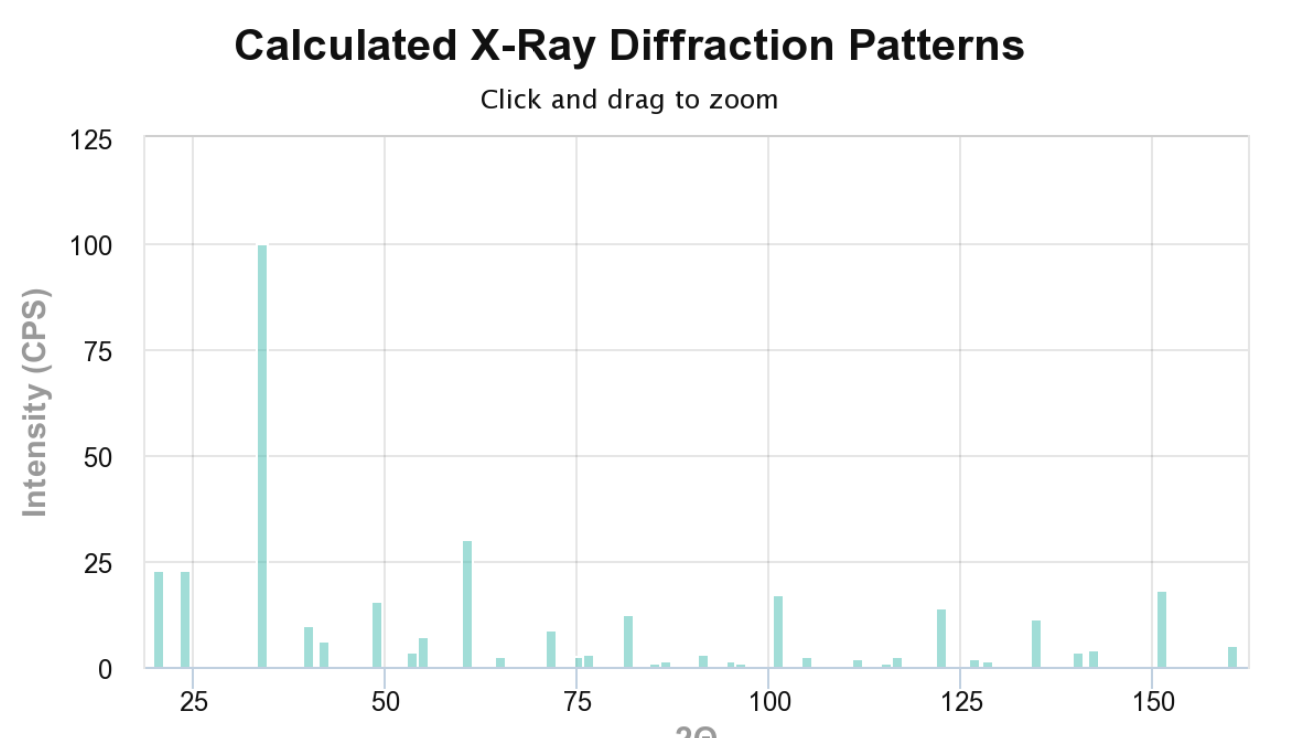

### Study of the first 3 diffractogram peaks with hkl indices

In [4]:
DiffractionPattern = XRDCuKa1Pattern.get_pattern(structure)
# Get peak informations
K2S_hkls = DiffractionPattern.hkls # Miller indices (https://en.wikipedia.org/wiki/Miller_index)
K2S_d_hkls = DiffractionPattern.d_hkls # interplanar spacings
incidenceAngle = DiffractionPattern.x # See https://en.wikipedia.org/wiki/Rachinger_correction
intensity = DiffractionPattern.y
ABSdiffractionPattern = XRDCuKa1Pattern.get_pattern(structure,scaled = False) # Get the absolute intensity value
abslIntensity = ABSdiffractionPattern.y
NoPeaks = 3
for peak in range(0,NoPeaks):
    print("\nPeak n.", peak+1)
    print("\t", "Miller index:", K2S_hkls[peak])
    print("\t", "Spacing d between adjacent (hkℓ) lattice planes Å:", round(K2S_d_hkls[peak], 3))
    print("\t", "2θ angles:", round(incidenceAngle[peak],3))
    print("\t", "Relative intensity value:", round(intensity[peak],3))
    print("\t", "Absolute intensity value:", round(abslIntensity[peak], 3))
    


Peak n. 1
	 Miller index: [{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]
	 Spacing d between adjacent (hkℓ) lattice planes Å: 4.31
	 2θ angles: 20.592
	 Relative intensity value: 23.089
	 Absolute intensity value: 89258.607

Peak n. 2
	 Miller index: [{'hkl': (1, 1, 0), 'multiplicity': 6}]
	 Spacing d between adjacent (hkℓ) lattice planes Å: 3.732
	 2θ angles: 23.821
	 Relative intensity value: 23.14
	 Absolute intensity value: 89453.75

Peak n. 3
	 Miller index: [{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]
	 Spacing d between adjacent (hkℓ) lattice planes Å: 2.639
	 2θ angles: 33.94
	 Relative intensity value: 100.0
	 Absolute intensity value: 386582.336


### Three peaks details

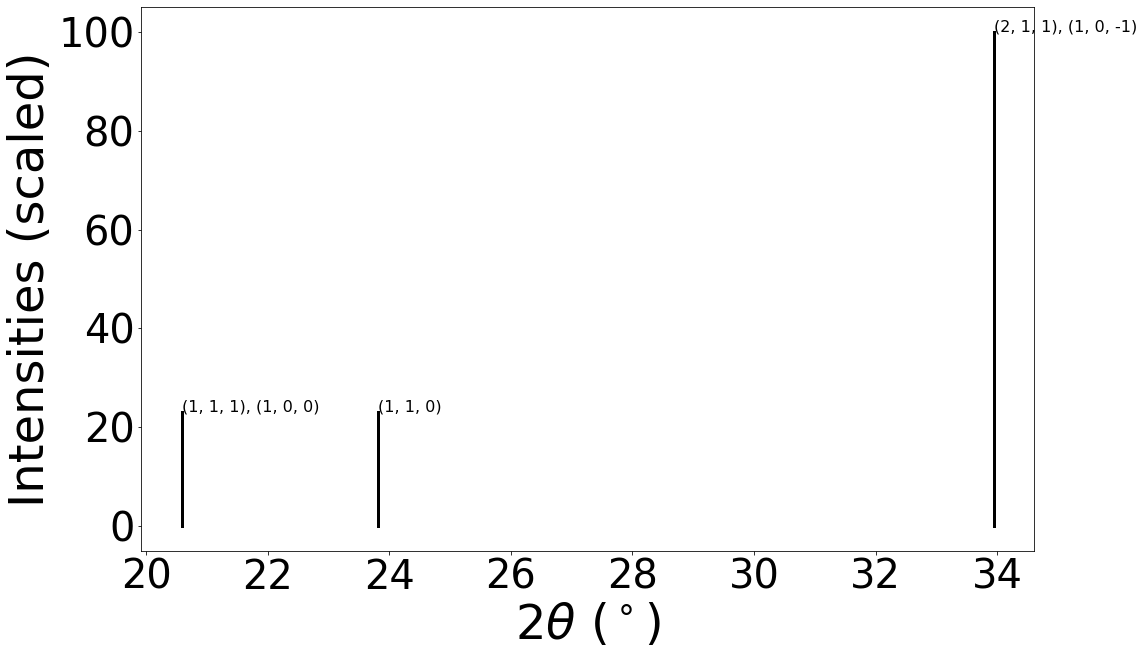

In [5]:
XRDCuKa1Pattern.show_plot(structure, two_theta_range = (0,40))